<a href="https://colab.research.google.com/github/adipurnamk/Belajar-Pengembangan-Machine-Learning/blob/master/Submission_1_NLP_LSTM__Multiclass_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset](https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv)

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
  -O /tmp/bbc-text.csv

--2020-09-17 05:27:54--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 209.85.145.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2020-09-17 05:27:54 (129 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
import pandas as pd
df = pd.read_csv('/tmp/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
# One-hot encoding

category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [4]:
text = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [5]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [7]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 195s - loss: 1.6049 - accuracy: 0.2174 - val_loss: 1.5929 - val_accuracy: 0.1978
Epoch 2/30
56/56 - 196s - loss: 1.5279 - accuracy: 0.3494 - val_loss: 1.3886 - val_accuracy: 0.3708
Epoch 3/30
56/56 - 196s - loss: 0.9709 - accuracy: 0.5489 - val_loss: 0.9553 - val_accuracy: 0.6629
Epoch 4/30
56/56 - 196s - loss: 0.3879 - accuracy: 0.8730 - val_loss: 0.8581 - val_accuracy: 0.7348
Epoch 5/30
56/56 - 194s - loss: 0.1083 - accuracy: 0.9674 - val_loss: 0.7750 - val_accuracy: 0.8090
Epoch 6/30
56/56 - 188s - loss: 0.0260 - accuracy: 0.9938 - val_loss: 0.8400 - val_accuracy: 0.8112
Epoch 7/30
56/56 - 186s - loss: 0.0112 - accuracy: 0.9978 - val_loss: 0.9828 - val_accuracy: 0.7910
Epoch 8/30
56/56 - 186s - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.9264 - val_accuracy: 0.8135
Epoch 9/30
56/56 - 186s - loss: 0.0337 - accuracy: 0.9910 - val_loss: 1.0860 - val_accuracy: 0.7865
Epoch 10/30
56/56 - 186s - loss: 0.0084 - accuracy: 0.9983 - val_loss: 1.2545 - val_accuracy: 0.7730

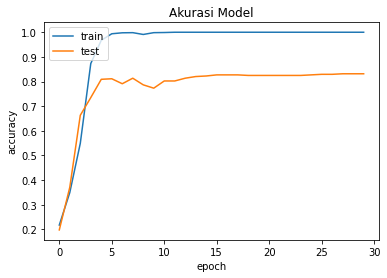

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

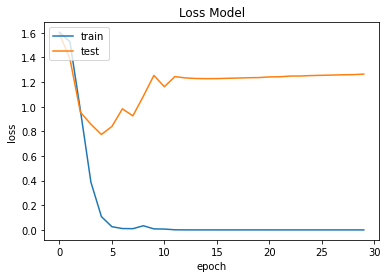

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch optimal harusnya 10 saja